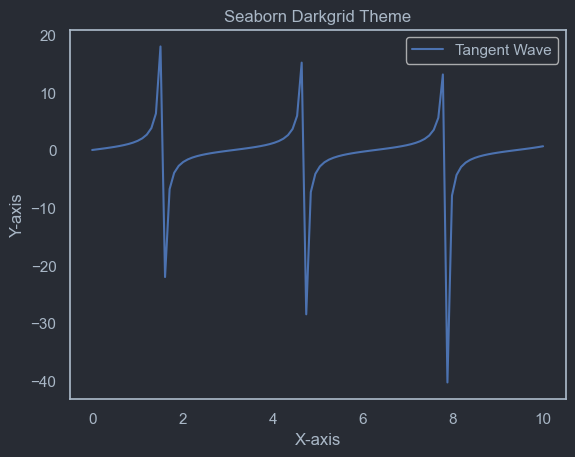

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def set_plot_colors():
    matplotlib.rcParams['figure.facecolor'] = '#282C34'  # 设置背景色
    matplotlib.rcParams['axes.facecolor'] = '#282C34'  # 设置坐标轴区域背景色
    matplotlib.rcParams['axes.edgecolor'] = '#A9B7C6'  # 设置边框颜色
    matplotlib.rcParams['axes.labelcolor'] = '#A9B7C6'  # 设置轴标签颜色
    matplotlib.rcParams['xtick.color'] = '#A9B7C6'  # 设置 x 轴刻度颜色
    matplotlib.rcParams['ytick.color'] = '#A9B7C6'  # 设置 y 轴刻度颜色
    matplotlib.rcParams['text.color'] = '#A9B7C6'     # 设置文本颜色
    matplotlib.rcParams['grid.color'] = '#666666'  # 设置网格颜色
    matplotlib.rcParams['lines.color'] = '#61AFEF'  # 设置线条颜色

set_plot_colors()
# 示例数据
x = np.linspace(0, 10, 100)
y = np.tan(x)

# 绘图
plt.plot(x, y, label='Tangent Wave')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Seaborn Darkgrid Theme')
plt.legend()
plt.show()

In [23]:
# !pip install seaborn

    numpy (>=1.19.*) ; python_version >= "3.7"
           ~~~~~~~^


In [33]:
import pandas as pd
import numpy as np

# 创建一个日期索引
date_index = pd.date_range(start='2023-01-01', periods=20, freq='D')

# 创建示例数据 (假设你有股票的 OHLC 数据)
data = {
    'Open': np.random.uniform(100, 120, 20),
    'High': np.random.uniform(120, 130, 20),
    'Low': np.random.uniform(90, 100, 20),
    'Close': np.random.uniform(100, 120, 20),
    'Volume': np.random.randint(1000, 10000, 20)
}

df = pd.DataFrame(data, index=date_index)

In [34]:
def calculate_cmf(df, period=14):
    """计算 ChaKin Money Flow (CMF) 指标."""
    money_flow = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    money_flow = money_flow * df['Volume'] # 乘以成交量
    cmf = money_flow.rolling(window=period).sum() / df['Volume'].rolling(window=period).sum()
    return cmf

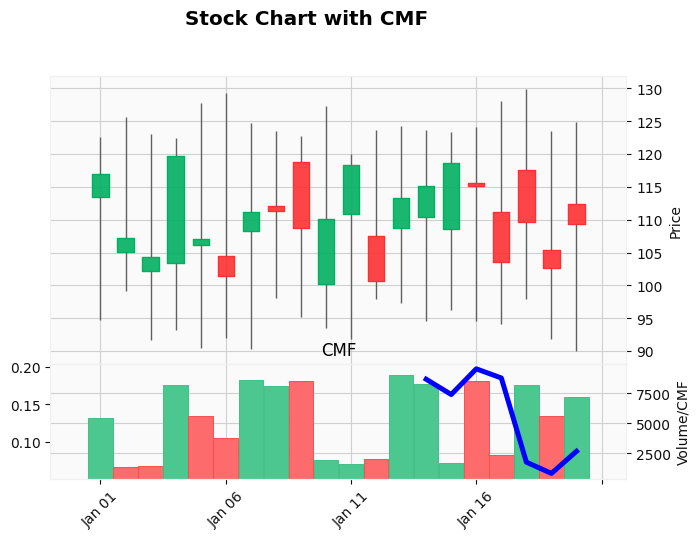

In [35]:
import mplfinance as mpf

# 计算 CMF 指标
df['CMF'] = calculate_cmf(df, period=14)

# 创建一个额外的面板，用于显示 CMF
apds = [mpf.make_addplot(df['CMF'], panel=1, color='blue', title='CMF')]

# 绘制金融图表
mpf.plot(df, type='candle', volume=True, addplot=apds, style='yahoo',
        title='Stock Chart with CMF',
        ylabel='Price',
        ylabel_lower='Volume/CMF')

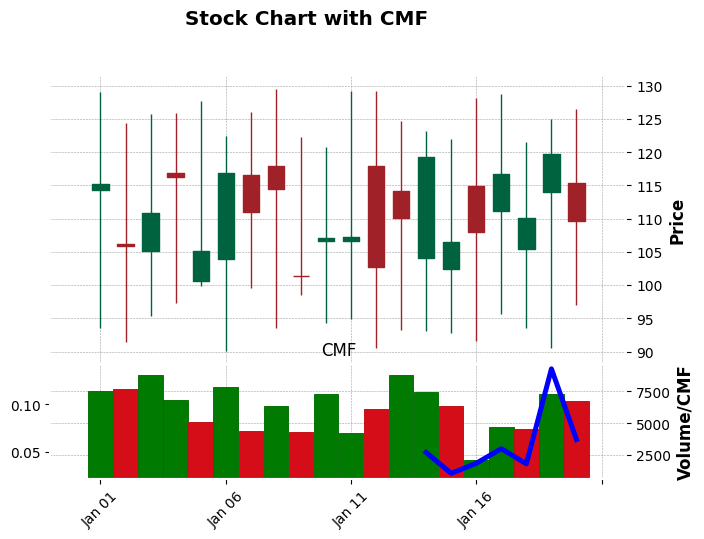

In [37]:
import pandas as pd
import numpy as np
import mplfinance as mpf

# 创建一个日期索引
date_index = pd.date_range(start='2023-01-01', periods=20, freq='D')

# 创建示例数据 (假设你有股票的 OHLC 数据)
data = {
    'Open': np.random.uniform(100, 120, 20),
    'High': np.random.uniform(120, 130, 20),
    'Low': np.random.uniform(90, 100, 20),
    'Close': np.random.uniform(100, 120, 20),
    'Volume': np.random.randint(1000, 10000, 20)
}

df = pd.DataFrame(data, index=date_index)

def calculate_cmf(df, period=14):
    """计算 ChaKin Money Flow (CMF) 指标."""
    money_flow = ((df['Close'] - df['Low']) - (df['High'] - df['Close'])) / (df['High'] - df['Low'])
    money_flow = money_flow * df['Volume'] # 乘以成交量
    cmf = money_flow.rolling(window=period).sum() / df['Volume'].rolling(window=period).sum()
    return cmf

# 计算 CMF 指标
df['CMF'] = calculate_cmf(df, period=14)

# 创建一个额外的面板，用于显示 CMF
apds = [mpf.make_addplot(df['CMF'], panel=1, color='blue', title='CMF')]

# 绘制金融图表
mpf.plot(df, type='candle', volume=True, addplot=apds, style='charles',
         title='Stock Chart with CMF',
         ylabel='Price',
         ylabel_lower='Volume/CMF')